Why RFM?
RFM (Recency, Frequency, Monetary) analysis is a marketing model using customer segmentation based on their transaction history.
This model could be very useful, especially for small and medium-sized enterprises (SMEs) with limited marketing resources, helping them focus on the potentially right customer segments to increase ROI, reduce churn, reduce cost, improve customer relationship, and a lot more.

How?
In RFM analysis, customers are scored based on three factors (Recency - how recently, Frequency - how often, Monetary - how much), then labeled based on the combination of RFM scores.

Reference:
https://www.putler.com/rfm-analysis

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [23]:
# import dataset
orders = pd.read_excel('Dataset.xlsx', sheet_name = 'Orders')
return_o = pd.read_excel('Dataset.xlsx', sheet_name = 'Return')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Price   9994 non-null   float64       
 12  Discount     9994 non-null   float64       
 13  Profit       9994 non-null   float64       
dtypes: datetime64[ns](2), float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [24]:
#convert 'Column Name' format into 'clomun_name' format
orders.columns = [i.lower().replace(' ','_') for i in orders.columns]
return_o.columns = [i.lower().replace(' ','_') for i in return_o.columns]
#since 1 order can have many sales then need to group by order id then order date then customer id
groupby_order = orders.groupby(['order_id', 'order_date', 'customer_id'], as_index=False)['sales'].sum()
groupby_order

,order_id,order_date,customer_id,sales
0,CA-2014-100006,2014-09-07,DK-13375,377.970
1,CA-2014-100090,2014-07-08,EB-13705,699.192
2,CA-2014-100293,2014-03-14,NF-18475,91.056
3,CA-2014-100328,2014-01-28,JC-15340,3.928
4,CA-2014-100363,2014-04-08,JM-15655,21.376
...,...,...,...,...
5004,US-2017-168802,2017-11-03,JO-15145,18.368
5005,US-2017-169320,2017-07-23,LH-16900,171.430
5006,US-2017-169488,2017-09-07,AA-10375,56.860
5007,US-2017-169502,2017-08-28,MG-17650,113.410


In [25]:
#
rtn_merge = groupby_order.merge(return_o, how='left', on='order_id')
non_return = rtn_merge.loc[rtn_merge['returned'] != 'Yes'].drop('returned', axis = 1)
non_return


,order_id,order_date,customer_id,sales
0,CA-2014-100006,2014-09-07,DK-13375,377.970
1,CA-2014-100090,2014-07-08,EB-13705,699.192
2,CA-2014-100293,2014-03-14,NF-18475,91.056
3,CA-2014-100328,2014-01-28,JC-15340,3.928
4,CA-2014-100363,2014-04-08,JM-15655,21.376
...,...,...,...,...
5004,US-2017-168802,2017-11-03,JO-15145,18.368
5005,US-2017-169320,2017-07-23,LH-16900,171.430
5006,US-2017-169488,2017-09-07,AA-10375,56.860
5007,US-2017-169502,2017-08-28,MG-17650,113.410


In [26]:
compare_date = datetime.datetime.strptime('2017-12-31', '%Y-%m-%d')

#calculate the value of r,f,m 
rfm = non_return.groupby('customer_id').agg({'order_date':'max','order_id':'count','sales':'sum'}).reset_index()
rfm.columns = ['customer_id','max_date','frequency','monetary']
rfm['recency'] = (compare_date - rfm['max_date']).dt.days
rfm = rfm.drop('max_date', axis = 1)
rfm = rfm[['customer_id', 'recency', 'frequency', 'monetary']]
rfm


,customer_id,recency,frequency,monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156
...,...,...,...,...
786,XP-21865,83,9,2110.726
787,YC-21895,5,4,5438.650
788,YS-21880,10,8,6720.444
789,ZC-21910,55,12,7892.998


In [27]:
# calculate r score, f score, m score
rfm['r_point'] = 5 - pd.qcut(rfm['recency'],q = 5, labels=False) 
rfm['f_point'] = pd.qcut(rfm['frequency'],q = 5, labels=False) + 1
rfm['m_point'] = pd.qcut(rfm['monetary'],q = 5, labels=False) + 1
rfm['rfm_score'] = 100*rfm['r_point'] + 10*rfm['f_point'] + rfm['m_point']
rfm


,customer_id,recency,frequency,monetary,r_point,f_point,m_point,rfm_score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112
...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353
787,YC-21895,5,4,5438.650,5,1,5,515
788,YS-21880,10,8,6720.444,5,4,5,545
789,ZC-21910,55,12,7892.998,4,5,5,455


In [28]:
# load dataframe of customer segmentation to each rfm_score
segment = pd.read_excel('Dataset.xlsx', sheet_name = 'Sheet2')
segment.columns = [i.lower().replace(' ','_')for i in segment.columns]
segment

,segment,rfm_score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [29]:
segment['rfm_score'] = segment['rfm_score'].str.split(',')
segment = segment.explode('rfm_score').reset_index(drop = True)
segment['rfm_score'] = segment['rfm_score'].astype(int)
segment

,segment,rfm_score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [30]:
score_rfm = rfm.merge(segment, how = 'left', on = 'rfm_score')
score_rfm


,customer_id,recency,frequency,monetary,r_point,f_point,m_point,rfm_score,segment
0,AA-10315,185,5,5563.560,2,2,5,225,At Risk
1,AA-10375,20,9,1056.390,5,5,2,552,Potential Loyalist
2,AA-10480,260,4,1790.512,2,1,3,213,About To Sleep
3,AA-10645,483,5,5073.975,1,2,5,125,At Risk
4,AB-10015,416,3,886.156,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353,Potential Loyalist
787,YC-21895,5,4,5438.650,5,1,5,515,Promising
788,YS-21880,10,8,6720.444,5,4,5,545,Champions
789,ZC-21910,55,12,7892.998,4,5,5,455,Champions


C:\Users\Dell-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


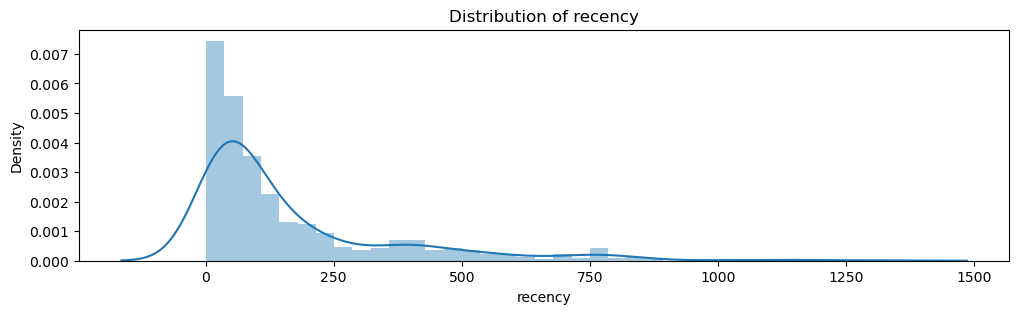

C:\Users\Dell-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


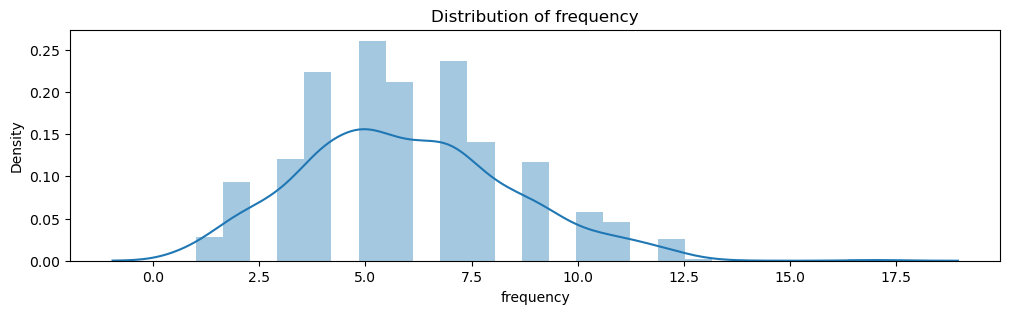

C:\Users\Dell-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


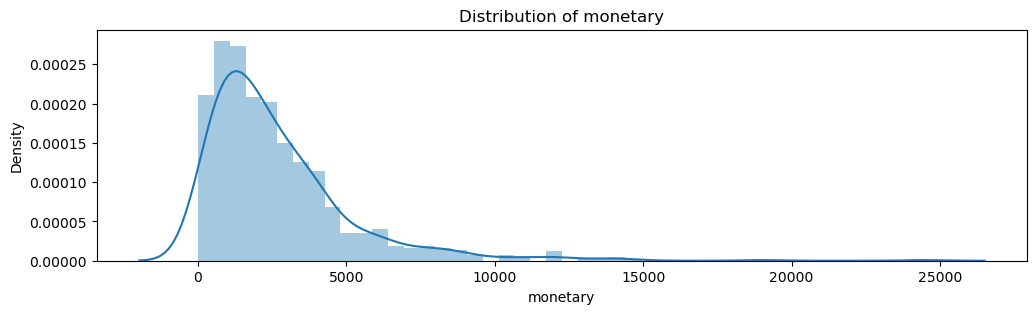

In [47]:
# show distribution of each variable of the model

colnames = ['recency', 'frequency', 'monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(score_rfm[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()


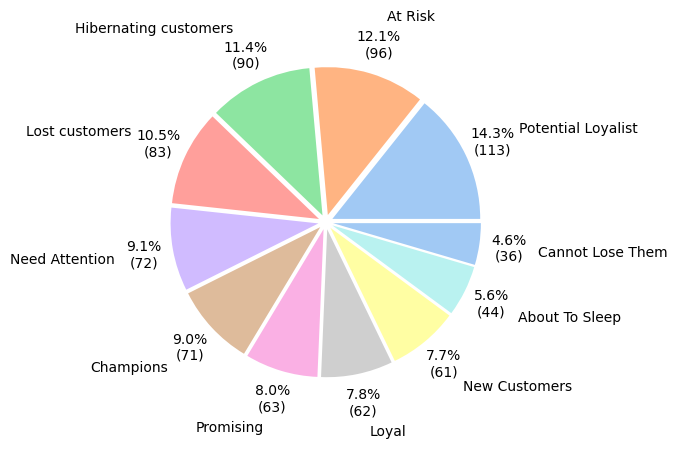

In [48]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
colors = sns.color_palette('pastel')[0:11]
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05) 
s = score_rfm['segment'].value_counts()
plt.pie(s,labels = s.index, autopct=autopct_format(s), colors = colors,pctdistance=1.2, labeldistance=1.4, explode = explode)
plt.show()
    
    